# Import Data



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = '/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/PID_ana.csv'
data_df = pd.read_csv(path)

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37418 entries, 0 to 37417
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mc_pid       37418 non-null  int64  
 1   ll_tof_pi    37418 non-null  float64
 2   ll_tof_k     37418 non-null  float64
 3   ll_tof_p     37418 non-null  float64
 4   ll_ts_pi     37418 non-null  float64
 5   ll_ts_k      37418 non-null  float64
 6   ll_ts_p      37418 non-null  float64
 7   px           37418 non-null  float64
 8   py           37418 non-null  float64
 9   pz           37418 non-null  float64
 10  p            37418 non-null  float64
 11  pt           37418 non-null  float64
 12  eta          18766 non-null  float64
 13  phi          37418 non-null  float64
 14  theta        37418 non-null  float64
 15  chi2overndf  37418 non-null  float64
 16  nhitsits     37418 non-null  int64  
 17  nhitstsb     37418 non-null  int64  
 18  nhitstsec    37418 non-null  int64  
 19  isfi

# EDA

### Tracks Types in dataset (pdg>0)

In [3]:
for pdg in data_df['mc_pid'].apply(abs).unique():
    print(pdg)

211
2212
11
321
13
1000010020


In [ ]:
# Drop id column and modify MC PID

data_df['mc_pid'] = data_df['mc_pid'].apply(abs)
data_df['mc_pid'] = np.where(data_df['mc_pid'].isin([211, 321, 2212]), data_df['mc_pid'], 0)

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Analysis/PID_analysis_tech.py:135: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


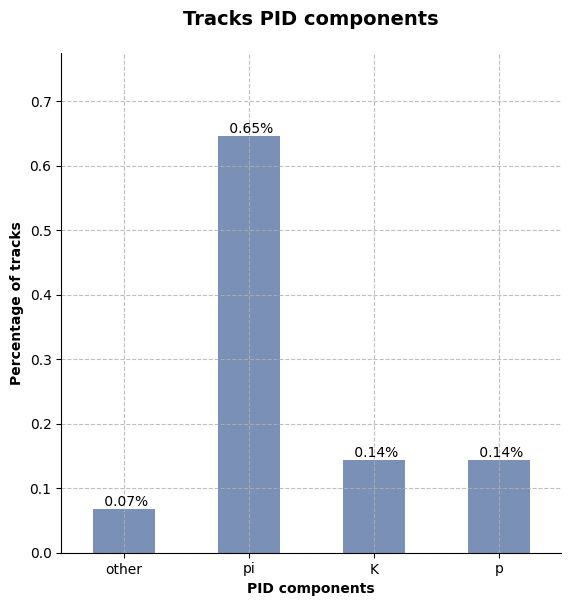

In [ ]:
from scripts import bar_plot

tracks_count = data_df.mc_pid.value_counts(normalize=True).reset_index()

bar_plot(
    data = tracks_count,
    x_data = 'mc_pid',
    y_data = 'proportion',
    xticklabels = ['other', 'pi', 'K', 'p'],
    title = 'Tracks PID components',
    xlabel = 'PID components',
    ylabel = 'Percentage of tracks',
    color='#4C72B0',
    width=0.5,
    alpha=0.8,
)

# Features Distributions

(<Figure size 1500x1200 with 9 Axes>,
 array([[<Axes: xlabel='px (GeV)', ylabel='Density'>,
         <Axes: xlabel='py (GeV)', ylabel='Density'>,
         <Axes: xlabel='pz (GeV)', ylabel='Density'>],
        [<Axes: xlabel='p (GeV)', ylabel='Density'>,
         <Axes: xlabel='pt (GeV)', ylabel='Density'>,
         <Axes: xlabel='eta', ylabel='Density'>],
        [<Axes: xlabel='phi (rad)', ylabel='Density'>,
         <Axes: xlabel='theta (rad)', ylabel='Density'>, <Axes: >]],
       dtype=object))

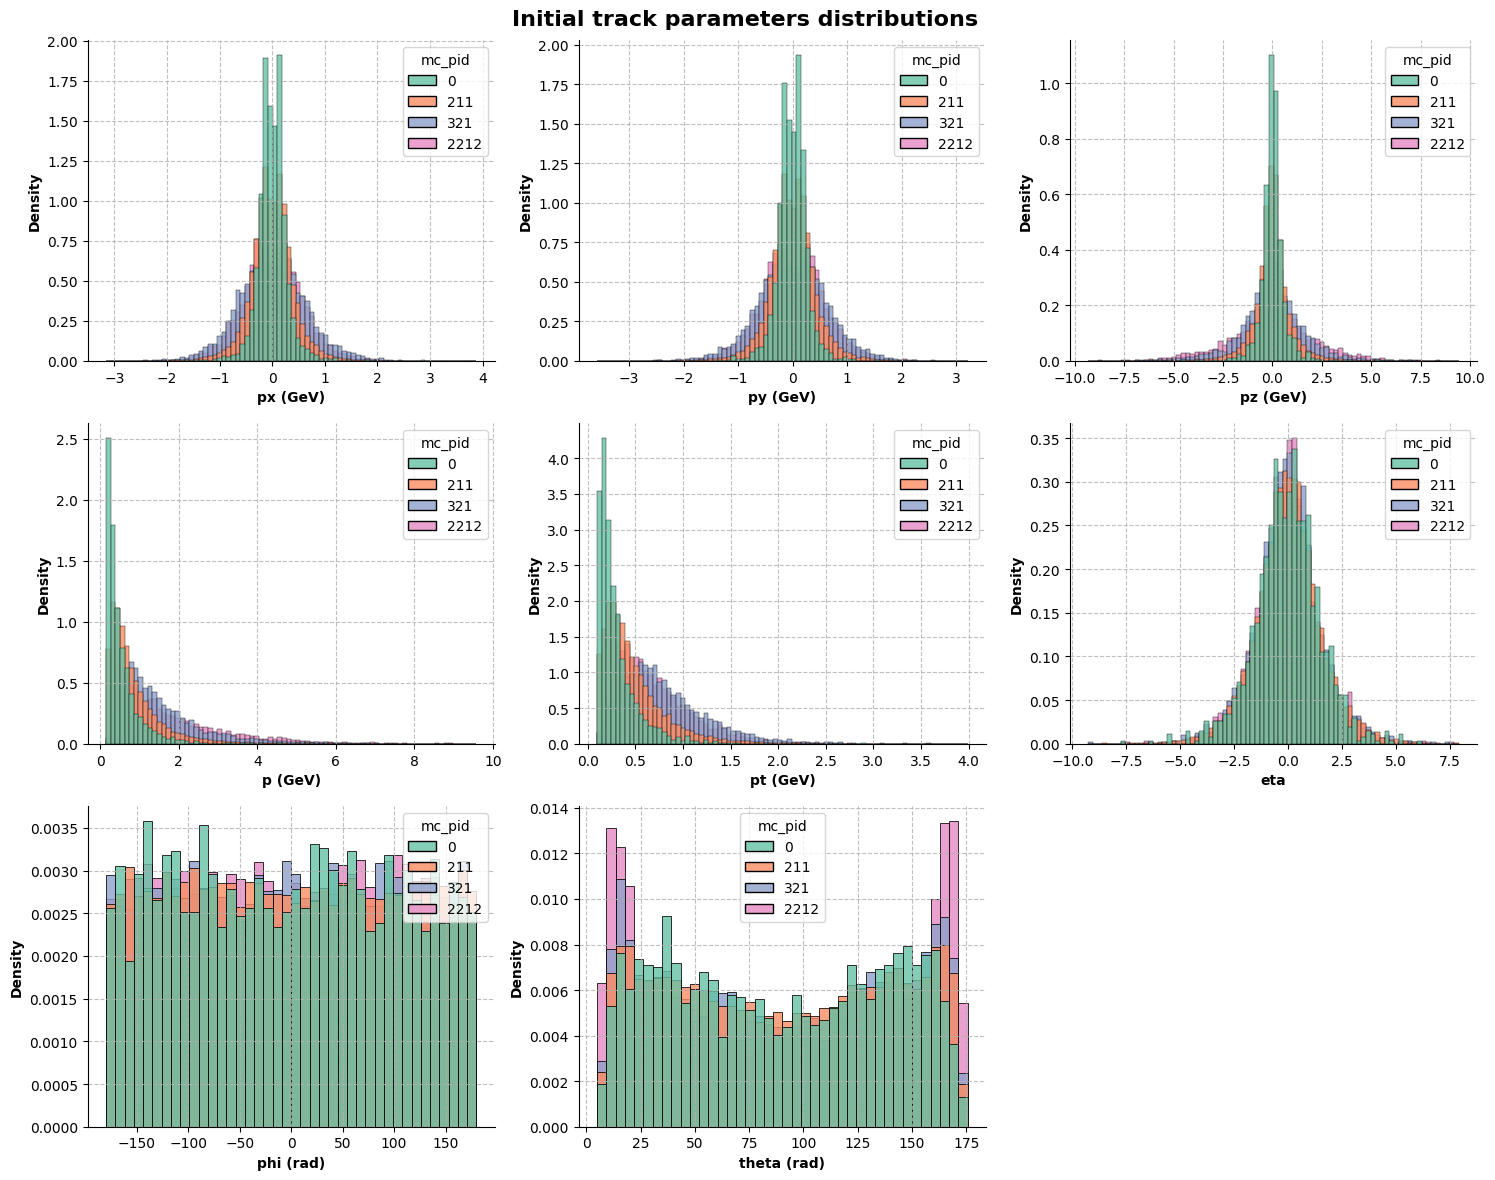

In [ ]:
from scripts import create_subplots_dynamic


create_subplots_dynamic(
    ncols=3,
    df=data_df,
    vars=['px', 'py', 'pz', 'p', 'pt', 'eta', 'phi', 'theta'],
    bins=[80, 80, 80, 80, 80, 80, 40, 40],
    plot_type='hist',
    hue=True,
    norm=True
)

(<Figure size 1500x800 with 6 Axes>,
 array([[<Axes: xlabel='IsFitted', ylabel='Counts'>,
         <Axes: xlabel='IsGood', ylabel='Counts'>,
         <Axes: xlabel='Convergency', ylabel='Counts'>],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

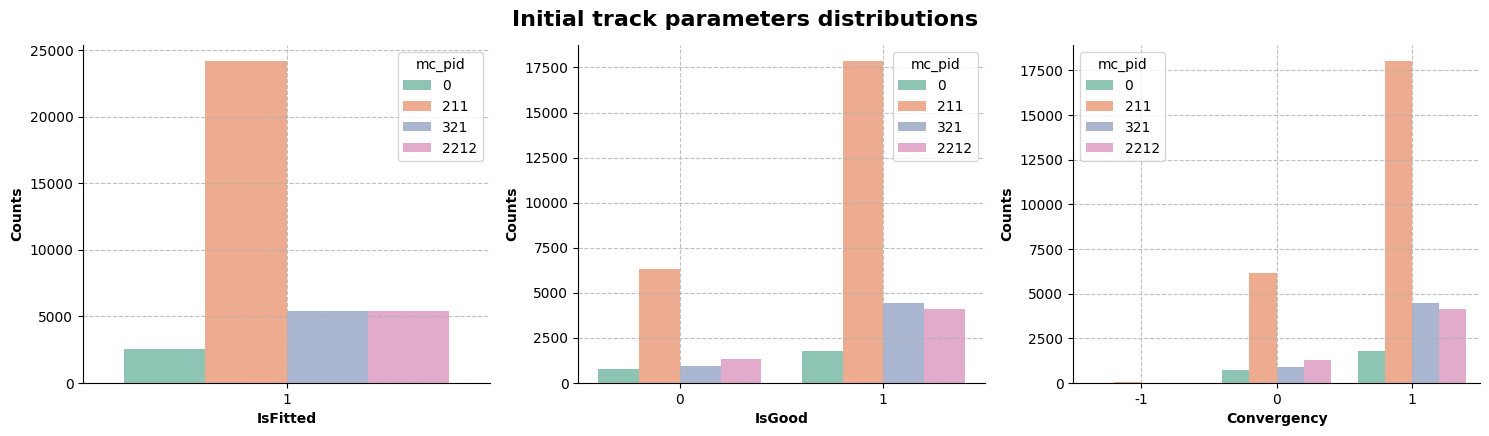

In [8]:
create_subplots_dynamic(
    ncols=3,
    df=data_df,
    vars=['isfitted', 'isgood', 'convergency'],
    # vars=['nhitsits'],
    # bins=[50, 50]
    plot_type='count',
    hue=True
)

(<Figure size 1000x1200 with 6 Axes>,
 array([[<Axes: xlabel='Chi2 ver NDF', ylabel='Counts'>,
         <Axes: xlabel='N Hits Its', ylabel='Counts'>],
        [<Axes: xlabel='N Hits TsB', ylabel='Counts'>,
         <Axes: xlabel='N Hits TsEc', ylabel='Counts'>],
        [<Axes: >, <Axes: >]], dtype=object))

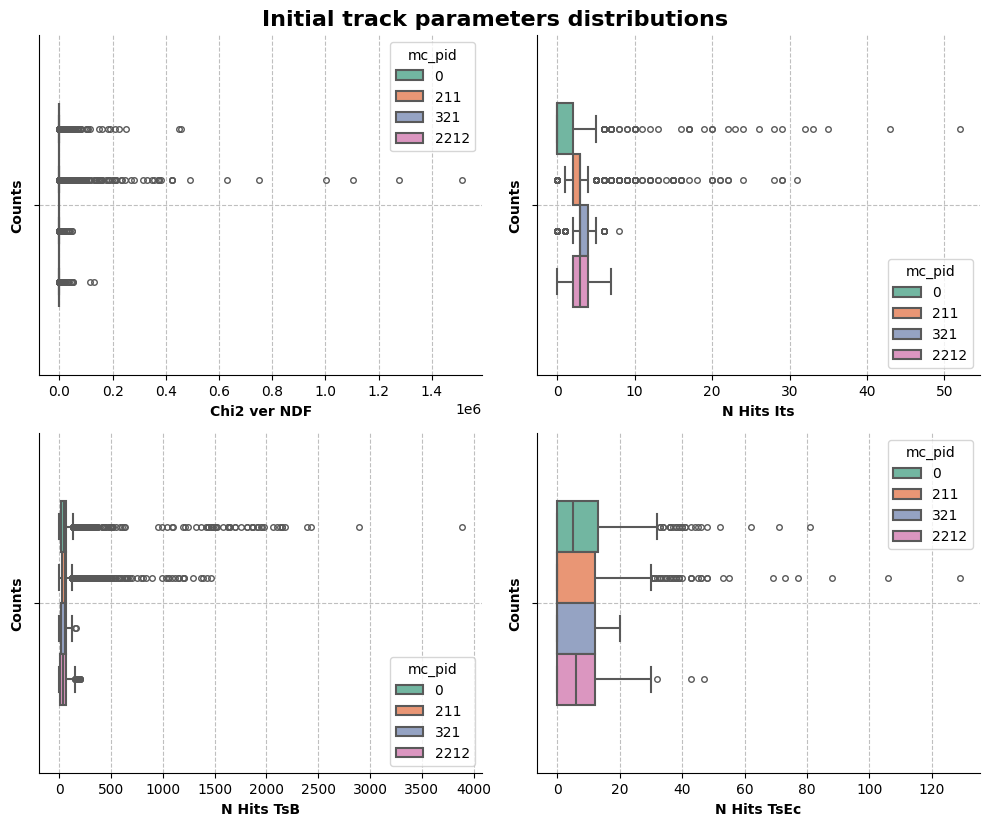

In [9]:
create_subplots_dynamic(
    ncols=2,
    df=data_df,
    vars=['chi2overndf', 'nhitsits', 'nhitstsb', 'nhitstsec'],
    # vars=['nhitsits'],
    # bins=[50, 50]
    plot_type='box',
    hue=True
)

track_finder->CheckMinItsHits(true,0);

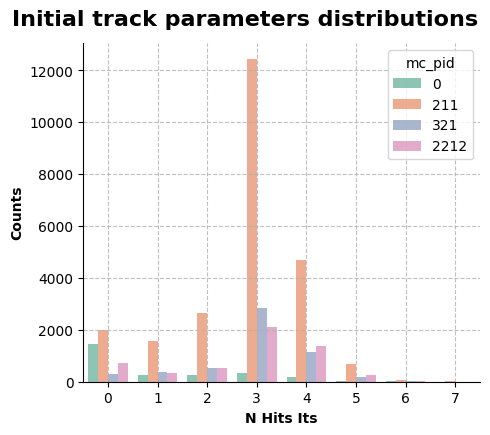

In [10]:
fig = create_subplots_dynamic(
    ncols=1,
    df=data_df[data_df.nhitsits < 8],
    vars=['nhitsits'],
    plot_type='count',
    hue=True
)

# plt.savefig('test.pdf')

track_finder->CheckMinTsHits(true,6);

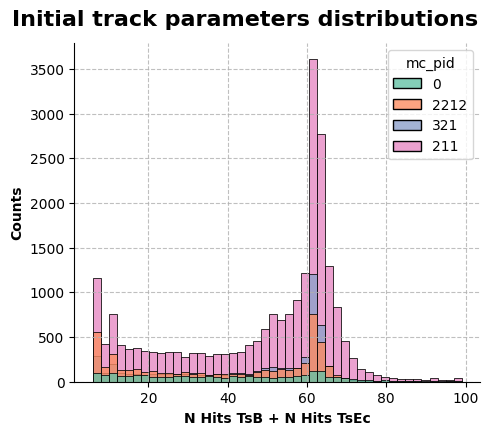

In [11]:
data_df['nhitstsb + nhitstsec'] = (data_df.nhitstsb + data_df.nhitstsec).rename('nhitstsb + nhitstsec')

fig = create_subplots_dynamic(
    ncols=1,
    df=data_df[data_df['nhitstsb + nhitstsec'] < 100],
    vars=['nhitstsb + nhitstsec'],
    plot_type='hist',
    hue=True
)

track_finder->CheckMinHits(true,7);

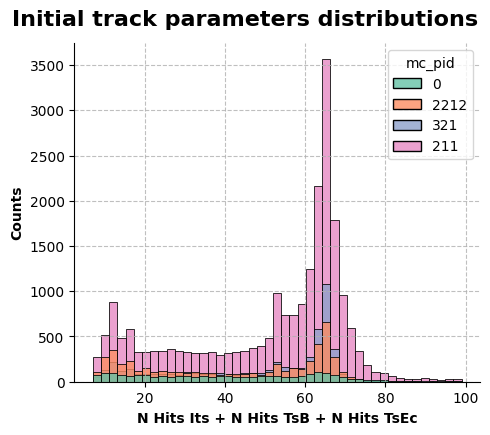

In [12]:
data_df['nhitsits + nhitstsb + nhitstsec'] = (data_df.nhitsits + data_df.nhitstsb + data_df.nhitstsec).rename('nhitsits + nhitstsb + nhitstsec')

fig = create_subplots_dynamic(
    ncols=1,
    df=data_df[data_df['nhitsits + nhitstsb + nhitstsec'] < 100],
    vars=['nhitsits + nhitstsb + nhitstsec'],
    plot_type='hist',
    hue=True
)

track_finder->CheckMinPartPt(true,0.1);

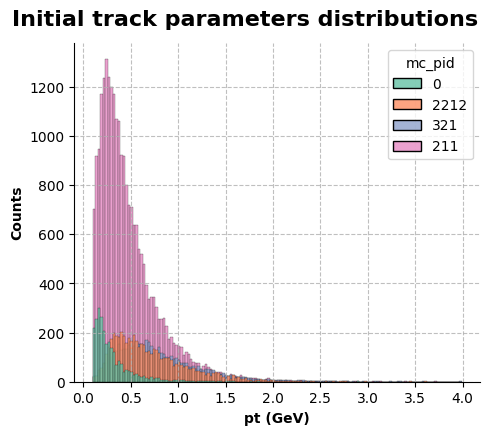

In [13]:
fig = create_subplots_dynamic(
    ncols=1,
    df=data_df,
    vars=['pt'],
    plot_type='hist',
    hue=True
)

track_finder->CheckMinPartMomentum(true,0.15);

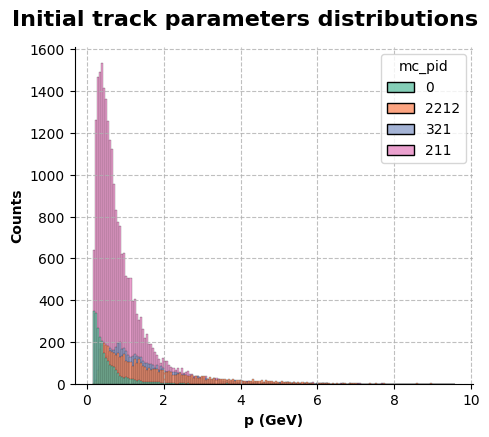

In [14]:
fig = create_subplots_dynamic(
    ncols=1,
    df=data_df,
    vars=['p'],
    plot_type='hist',
    hue=True
)

(<Figure size 500x800 with 2 Axes>,
 array([<Axes: xlabel='Chi2 ver NDF', ylabel='Density'>, <Axes: >],
       dtype=object))

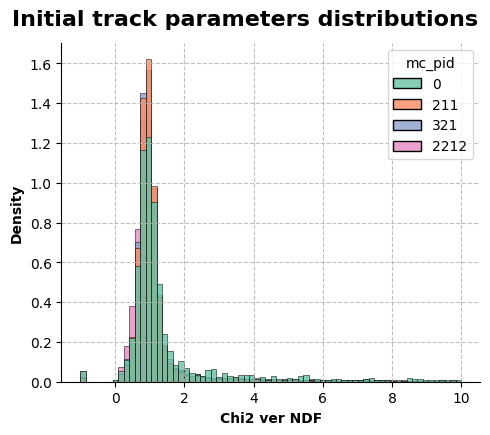

In [15]:
create_subplots_dynamic(
    ncols=1,
    df=data_df[data_df.chi2overndf < 10],
    vars=['chi2overndf'],
    bins=[70],
    plot_type='hist',
    hue=True,
    norm=True
)

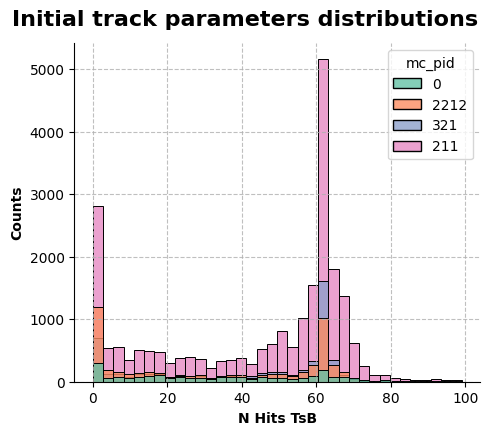

In [16]:
fig = create_subplots_dynamic(
    ncols=1,
    df=data_df[data_df.nhitstsb < 100],
    vars=['nhitstsb'],
    plot_type='hist',
    hue=True
)

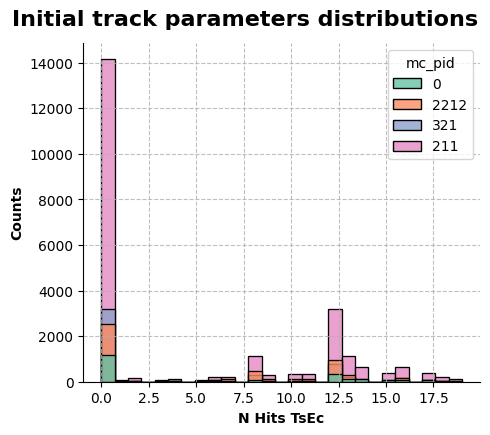

In [17]:
fig = create_subplots_dynamic(
    ncols=1,
    df=data_df[data_df.nhitstsec < 20],
    vars=['nhitstsec'],
    plot_type='hist',
    hue=True
)

### Possible PID approach
$
Output = 
\begin{cases}
  ST + TOF & \text{if } p \leq 0.47 \\
  ST \times exp[-13.86 \times (p - 0.47)] + TOF & \text{if } p > 0.47
\end{cases}
$

# Approach: Max Softmax TOF

### Prepare data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    
    
path = '/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/PID_ana.csv'
data_df = pd.read_csv(path)

data_df['mc_pid'] = np.where(data_df['mc_pid'].isin([211, 321, 2212]), data_df['mc_pid'], 0)

def softmax(array):
    max_vals = np.max(array)
    array = array - max_vals
    exp_vals = np.exp(array)
    res = exp_vals / np.sum(exp_vals)
    return res


data_df[['ll_tof_pi', 'll_tof_k', 'll_tof_p']] = data_df[['ll_tof_pi', 'll_tof_k', 'll_tof_p']].apply(softmax, axis=1)
# data_df[['ll_ts_pi', 'll_ts_k', 'll_ts_p']] = data_df[['ll_ts_pi', 'll_ts_k', 'll_ts_p']].apply(softmax, axis=1)  

ll_df = data_df[['mc_pid', 'll_tof_pi', 'll_tof_k', 'll_tof_p']]

### Find best threshold

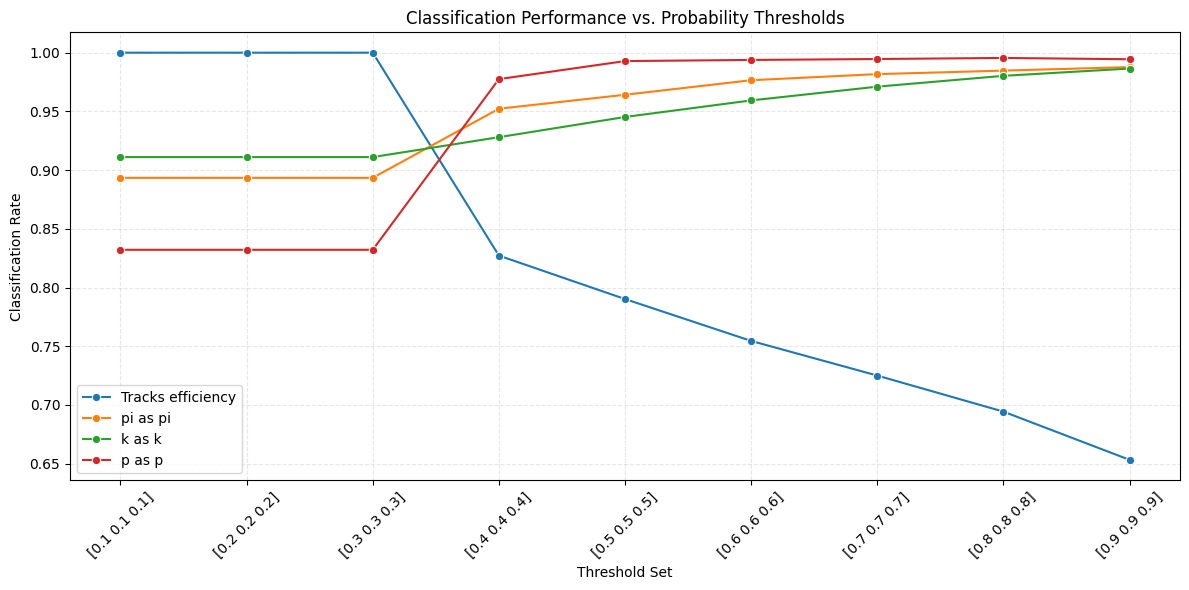

In [5]:
from scripts import choice
from scripts import check_thresholds
from itertools import product


thresholds = np.arange(0.1, 1.0, 0.1)

thresholds = np.column_stack([thresholds, thresholds, thresholds])
# thresholds = np.array(list(product(thresholds, repeat=3)))
    
check_thresholds(
    df=ll_df,
    thresholds=thresholds
)

plt.savefig(f'../plots/PID_thresholds.pdf')

### Selected variant validation

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Analysis/scripts.py:2043: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f'as {label}' for label in pred_labels])


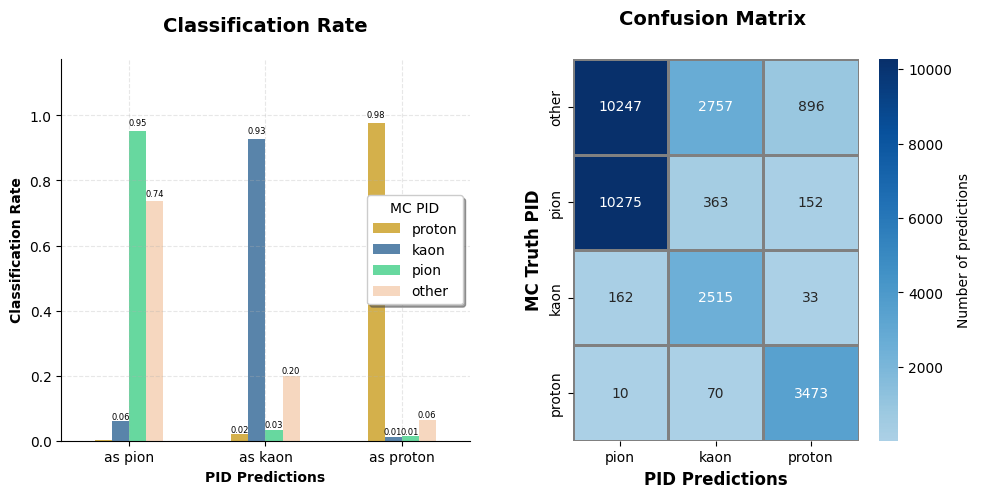

In [12]:
from scripts import classification_quality
from scripts import choice


res_df = choice(ll_df, [0.4, 0.4, 0.4])

classification_rate_res = classification_quality(
    df=res_df,
    visualize=True,
    title=''
)

classification_rate_res[1].savefig(f'../plots/PID_classification_rate.pdf')